# Is it a bird?

In [4]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

# 1. Dowload images of objects

In [ ]:
from fastcore.all import *
from duckduckgo_search import DDGS #  Web-Recherche, Bildersuche oder Datensammlung

In [7]:
def search_images(keywords, max_images=200): return L(DDGS().images(keywords=keywords, max_results=max_images)).itemgot('image')

In [12]:
# test image suche
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=pexels-roshan-kamath-1661179.jpg&fm=jpg'

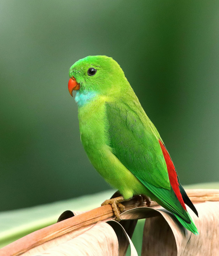

In [13]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(url=urls[0], dest=dest, show_progress=False)


from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)


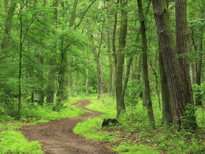

In [17]:
download_url(url=search_images('forest', max_images=1)[0], dest='forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(205,205)

In [19]:
searches = 'forest', 'bird'
path = Path('bird_or_forest')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(30)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(30)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(30)
    resize_images(path/o, max_size=400, dest=path/o)

/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarn

# 2. Train the model

Die drei Zeilen prüfen und löschen kaputte oder ungültige Bilder, die beim Download z. B. beschädigt wurden oder nicht korrekt gespeichert werden konnten.

In [21]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/home/lukelo-tshakulongo/BaKoko/SC/Code/Mulandu/DLConcepts/venv/lib/python3.12/site-packages/PIL/Image.py:3570: UserWarn

49

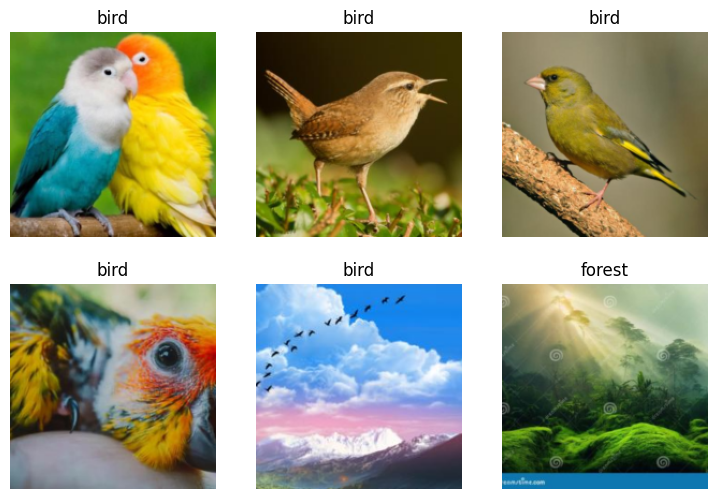

In [26]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='aquish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [28]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.651741,0.168421,0.046296,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.272051,0.148774,0.041667,00:04
1,0.191674,0.136238,0.027778,00:04
2,0.132874,0.136994,0.027778,00:03
3,0.104999,0.138384,0.027778,00:03
4,0.079873,0.133811,0.027778,00:03


In [29]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}\nProbebility it's a forest image: {probs[1]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
Probebility it's a forest image: 0.0000
